<a href="https://colab.research.google.com/github/Maria-Gitau/Compiler-Construction/blob/main/Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members


1. 115325 Dennis Kipkorir Koech
2. 121058 Faith Sanne Odhiambo
3. 121788 Alumasa Rees
4. 118300 Kenneth Temba Lumuli
5. 102851 Maria Gitau
6. 118640 Tevin Musau Mutua


## **LAB ACTIVITY 1**

## **What is FLEX, YACC, LEX and BISON**

# FLEX - Fast Lexical Analyzer:
FLEX is a computer program designed by Vern Paxon in 1987 for generating lexical analyzers. Written in C, Flex is more flexible than LEX and YACC while also producing faster code. The program structure of Flex is divided into three sections: **the definition section**, which contains the declaration of variables, regular definitions, manifest constants all of which are enclosed in "%{}%"; **the rules section**, which contains a series of rules in the form of pattern and action which areeonclosed in "%%%%"; and **the user code section** which contains C statements and additional functions.
Flex is a tool for generating scanners, thus to perform this:
 - Flex reads the given input files, or its standard input, if no file names are given, for a description of a desired scanner to generate. The description is in the form of pairs of regular expressions and C code, called rules. 
 - Flex generates as output a C source file, lex.yy.c, which defines a routine yylex(). 
 - This file is compiled and linked with the -lfl library to produce an executable. 
 - When the executable is run, it analyzes its input for occurrences of the regular expressions. 
 - Whenever it finds one, it executes the corresponding C code.


An example of Flex Syntax:


In [ ]:
#The definition section which contains a single variable
%{
int count = 0;
%}
#The rules section ehich contains three rules
  #first rule matches with capital letters
  #second rule matches with any character except newline
  #third rule does not take input after the enter
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}
.     {printf("%s not a capital letter\n", yytext);}
\n    {return 0;}
%%
#Code Section prints the number of capital letter present in the given input
int yywrap(){}
int main(){
yylex();
printf("\nNumber of Capital letters " 
      "in the given input - %d\n", count);
  
return 0;
}

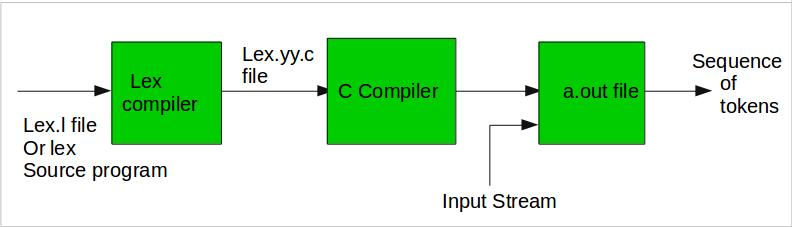

##YACC - Yet Another Compiler-Compiler
* Yacc is a computer program for the Unix Operating systems developed by Stephen C, Johnson. It is a Look Ahead Left-to-Right Rightmost Derivation (LALR) parser-generator. LALR parser-generators are desirable because they are very fast and small in comparison to other types of parsers. The program structure of Yacc is similar to Flex in that is is divided into three sections, those being the definitions, rules and user code.
* Yacc generates C code for a syntax analyzer, or parser. It uses grammar rules that allow it to analyze tokens from lex and create a syntax tree. A syntax tree imposes a hierarchical structure on tokens. 
* Code generation, does a depth-first walk of the
syntax tree to generate code.


YACC Diagram (Source: (Nachiappan, n.d.))

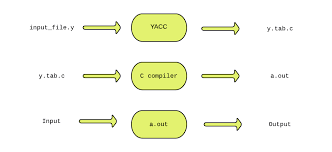

In [ ]:
%{
   include <ctype.h>
   include <stdio.h>
   define YYSTYPE double /* double type for yacc stack */
%}
 
%%
 Lines :  Lines S '\n' { printf("OK \n"); }
       |  S '\n’
       |  error '\n' {yyerror("Error: reenter last line:");
                        yyerrok; };
 S     :  '(' S ')’
       |  '[' S ']’
       |   /* empty */    ;
%%
 
include "lex.yy.c"
  
void yyerror(char * s)
/* yacc error handler */
{  
 fprintf (stderr, "%s\n", s);
}
  
int main(void)
 {
 return yyparse();
 } 

#LEX - Lexical Analyser Generator
* Lex is a program that generates lexical analyzer that reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program (LEX - Javatpoint, n.d.). 
* Lex generates C code for a lexical analyzer, or scanner. It uses patterns that match strings in the input and converts the strings to tokens. Tokens are numerical representations of strings, and simplify processing.
* It is used with YACC parser generator. Lex File format follows the same format as Flex and Yacc, in that it is divided into three sections of definitions, rules and user code functions.

A diagram representing Lex (Source: ):

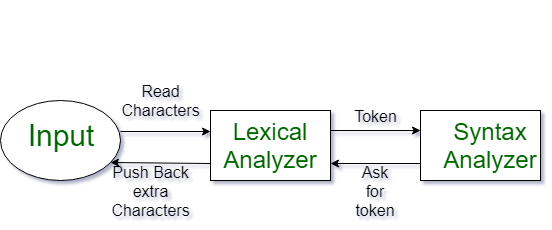

In [ ]:
/*Declarations section start here*/

/* Auxiliary declarations start here*/

%{
	include <stdio.h>
	int global_variable;
%}

/*Auxiliary declarations end & Regular definitions start here*/

    number [0-9]+           //Regular definition
    op     [-|+|*|/|^|=]    //Regular definition

/*Declarations section ends here*/

%%

/* Rules */

%%

/* Auxiliary functions */

#BISON
* Bison is a general-purpose parser generator that converts a grammar description (Bison Grammar Files) for an LALR(1) context-free grammar into a C program to parse that grammar. 
* It is a bottom-up parser whereby it attempts, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol. 
* Bison is designed for use with C code and generates a parser written in C that is configured for use in conjunction with a flex-­generated scanner.

Source: Gao, 2022.

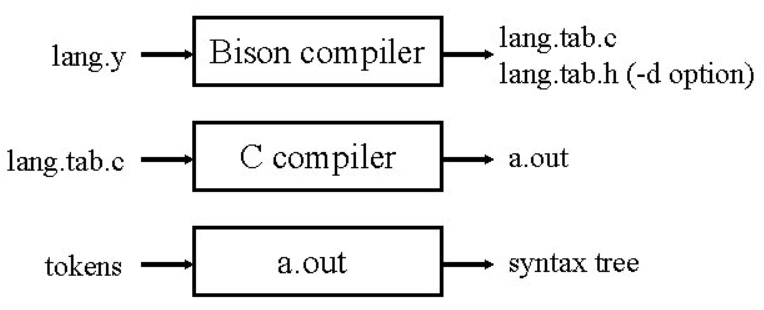

* The structure of the bison input file is shown below:
```
{
Prologue/C Declaration
%}
Bison Declarations
%%
Grammar Rule/Productions
%%
Epilogue/Additional C Code/User subroutines
```

* Below is a sample code snippet for a simple calculator that recognizes and evaluates binary postfix expressions using a stack:

In [ ]:
%{
 #include <stdio.h>
 #include <assert.h>
 static int Pop();
 static int Top();
 static void Push(int val);
%}
%token T_Int
%%
S : S E '\n' { printf("= %d\n", Top()); }
 |
 ;
E : E E '+' { Push(Pop() + Pop()); }
 | E E '-' { int op2 = Pop(); Push(Pop() - op2); }
 | E E '*' { Push(Pop() * Pop()); }
 | E E '/' { int op2 = Pop(); Push(Pop() / op2); }
 | T_Int { Push(yylval); }
 ;
%%
3
static int stack[100], count = 0;
static int Pop() {
 assert(count > 0);
 return stack[--count];
}
static int Top() {
 assert(count > 0);
 return stack[count-1];
}
static void Push(int val) {
 assert(count < sizeof(stack)/sizeof(*stack));
 stack[count++] = val;
}
int main() {
 return yyparse();
}

# References
1. GeeksforGeeks. (2022, June 28). Flex (Fast Lexical Analyzer Generator ). Retrieved September 9, 2022, from https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/
2. Paxson, V. (1995, April). Flex (2.5) [Software]. https://www.di.uminho.pt/~prh/FlexTutorial.pdf
3. YACC. (n.d.). Retrieved September 9, 2022, from https://silcnitc.github.io/yacc.html
4. A Guide to Lex & Yacc. (2011). In NC State University. Retrieved September 9, 2022, from https://arcb.csc.ncsu.edu/~mueller/compiler/compiler13/hw/hw1/y_man.pdf
5. Levine, J. R. (2013). Flex &amp; Bison. O'Reilly
6. Biswas, G. (2016). Yacc/Bison. Lecture
7. Johnson, M. (2012, July). Introduction to Bison. Lecture
8. Gao, L. (2022). Bison Tutorial. Bison tutorial. Retrieved September 15, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html

## **LAB ACTIVITY 2**

QUESTION 1

Example 1

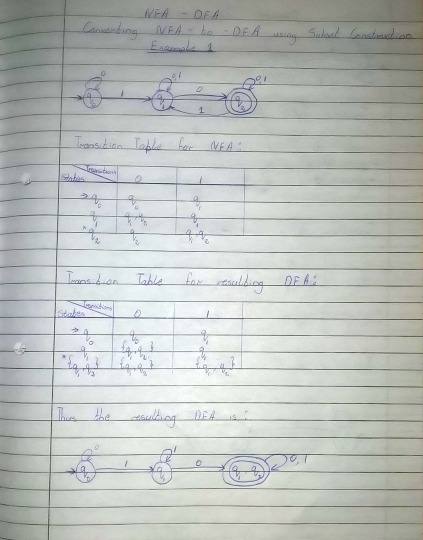

Example 2

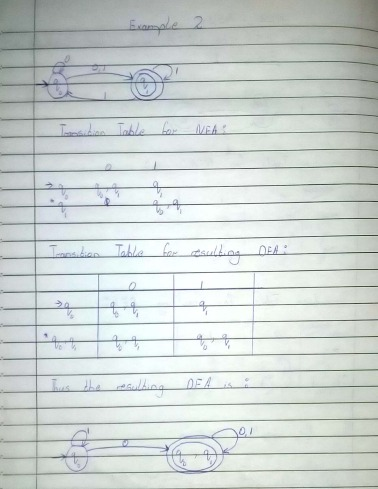

**QUESTION 2**

Show how to use Flex when building a simple lexical analyzer

In [ ]:
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/
/* Declaration */

%{
int count_characters, count_nums, count_caps, count_small, count_marks, count_space = 0;
%}
 
/* Rules */
/* Rule 1: finds small letters
 * Rule 2: finds capital letters
 * Rule 3: finds numbers
 * Rule 4: finds punctuation marks
 * Rule 5: finds white spaces
*/
%%
[a-z] 					{printf("%s is a small letter\n", yytext); count_small++; count_characters++;}
[A-Z]						{printf("%s is a capital letter\n", yytext); count_caps++; count_characters++;}
[0-9]    					{printf("%s is a digit\n", yytext); count_nums++; count_characters++;}
["!"|"?"|"."|":"|";"]			{printf("%s is a punctuation mark\n", yytext); count_marks++; count_characters++;}
[" "]						{printf("%s is a whitespace\n", yytext); count_space++;}
\n       					{return 0;}
%%
 
/*** Code Section prints the number of
capital letter present in the given input***/
/* User SubRoutine */

int yywrap(){}

int main(){
 
// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
          which contains the input*/
/* yylex() - this is the main flex function
          which runs the Rule Section*/
// yytext is the text in the buffer
 
// Take input from file

FILE *fp;
char filename[50];
printf("Enter the filename: \n");
scanf("%s",filename);
fp = fopen(filename,"r");
yyin = fp;
 
yylex();
printf("\nNumber of characters in the given input: %d\n", count_characters);
printf("\nNumber of capital letters in the given input: %d\n", count_caps);
printf("\nNumber of small letters in the given input: %d\n", count_small);
printf("\nNumber of numbers in the given input: %d\n", count_nums);
printf("\nNumber of punctuation marks in the given input: %d\n", count_marks);
printf("\nNumber of spaces in the given input: %d\n", count_space);

return 0;
}

An example of the output on the command line:


1.   The input file (maria.l) contains the following line of text:" 101 This * little ! light * of ! MINE 101 "
2.   The output below indicates how the simple lexical analyzer is able to identify the small letters, capital letters, numbers, punctuation marks and white spaces





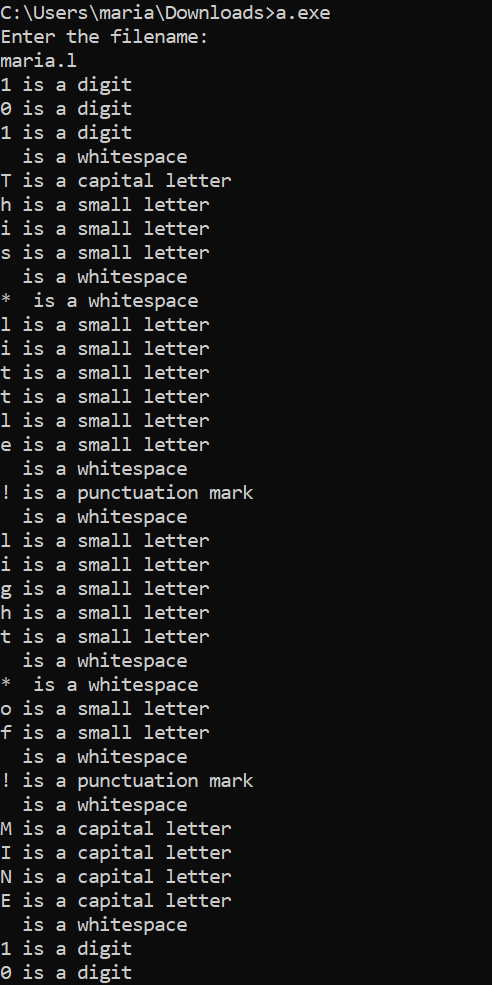